In [ ]:
#!pip install numba

In [ ]:
#from numba import jit
import numpy as np
import random

In [ ]:
random.seed(26)

In [ ]:
np.random.seed(26)

# **Que 1**

---

*The RL problem corrresponding to the MDP planning problem of robot movement cannot be solved using model based approach since the MDP is reducible which can be seen as a terminal state appears in the moving action if we take a black action at moving state and to be able to solve an RL problem using model based approaches the MDP must be irreducible.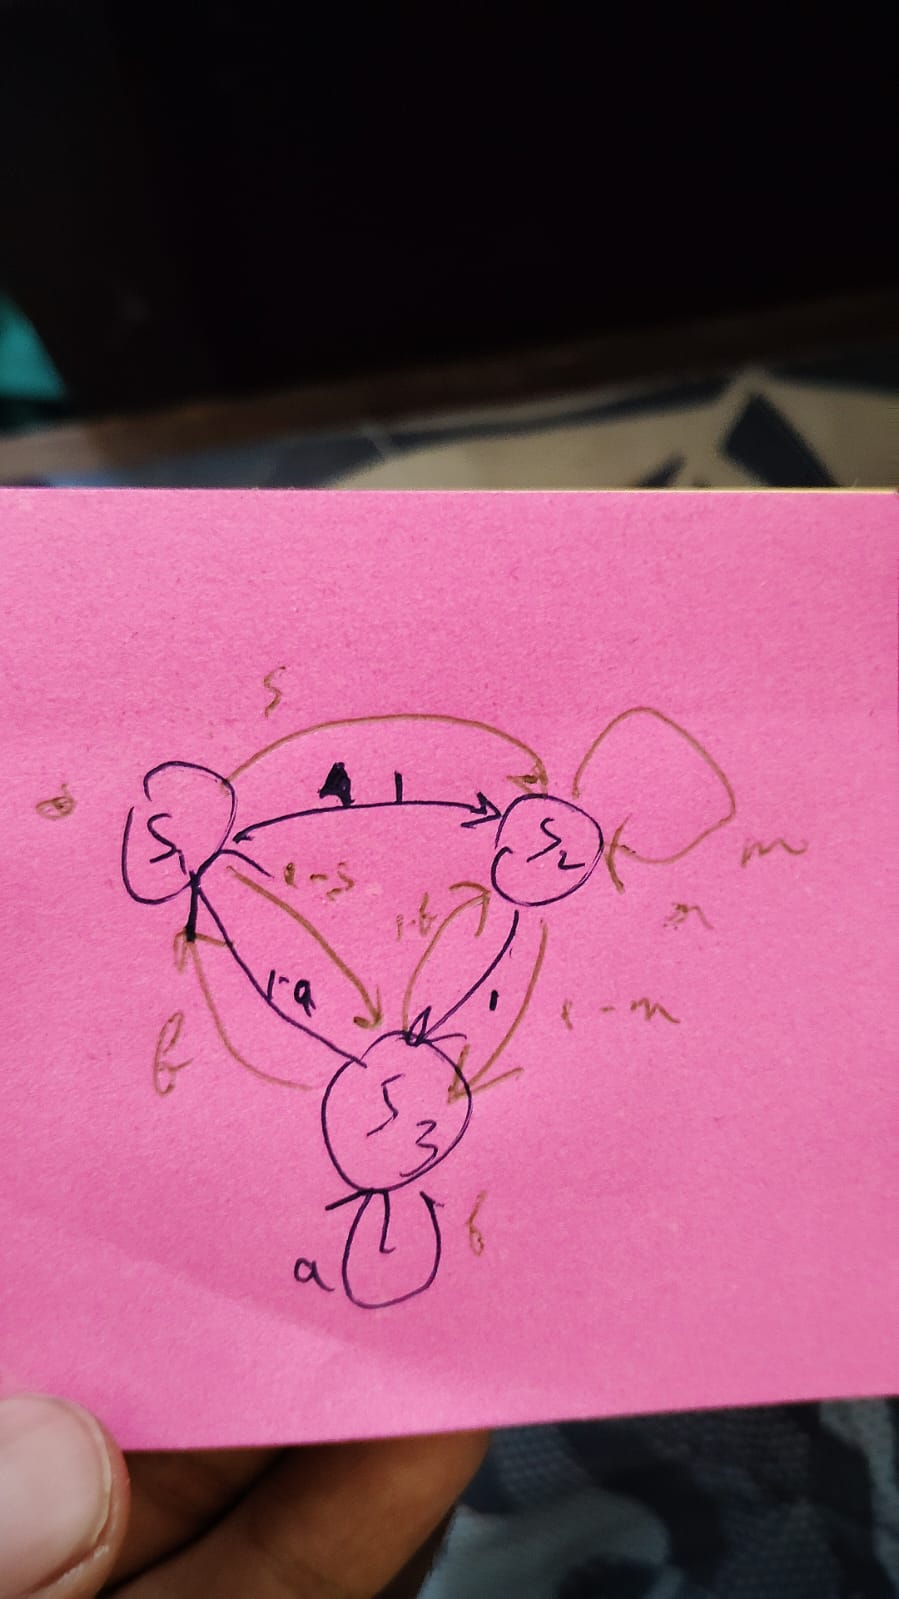*

# **Que 2**

mdp for QUE 2 given in above image


green - 0 -------------- blue - 1

In [ ]:
#Defining Transition probability params
m = random.random()
f = random.random()
s = random.random()
a = random.random()
gamma = 0.9

In [ ]:
m,f,s,a,gamma

(0.7472912662232836,
 0.20275263234590968,
 0.20515865409715361,
 0.6007571260930179,
 0.9)

In [ ]:
#The environment
T = np.zeros([3,2,3])
T[0][0]= [0,s,1-s]
T[0][1]= [0,1,0]
T[1][0]= [0,m,1-m]
T[1][1]= [0,0,1]
T[2][0]= [f,0,1-f]
T[2][1]= [1-a,0,a]

R = np.zeros([3,2,3])
R[0][0]= [0,1,2]
R[0][1]= [0,2,0]
R[1][0]= [0,1,2]
R[1][1]= [0,0,-1]
R[2][0]= [1,0,-1]
R[2][1]= [3,0,2]


In [ ]:
T

array([[[0.        , 0.20515865, 0.79484135],
        [0.        , 1.        , 0.        ]],

       [[0.        , 0.74729127, 0.25270873],
        [0.        , 0.        , 1.        ]],

       [[0.20275263, 0.        , 0.79724737],
        [0.39924287, 0.        , 0.60075713]]])

In [ ]:
#@jit(nopython=True)
def optimal_policy(T,R,gamma):
  va = np.zeros(3)
  vb = np.zeros(3)
  action = np.zeros(2)
  optimal_policy = np.zeros(3,dtype=int)
  while(1):
    #vb = np.zeros(3)*
    #  state 1 -  [0]   , state 2 - [1]  , state 3 - [2]

    #   action [0] - green,   action [1] - blue

    # state 1
    action[0] = sum(T[0][0]*(R[0][0]  + gamma*va ))
    action[1] = sum(T[0][1]*(R[0][1]  + gamma*va ))
    if action[0]>=action[1]:
     optimal_policy[0] = 0
    else :
     optimal_policy[0] = 1
    vb[0] = np.max(action)

    # state 2
    action[0] = sum(T[1][0]*(R[1][0]  + gamma*va ))
    action[1] = sum(T[1][1]*(R[1][1]  + gamma*va ))
    if action[0]>=action[1]:
      optimal_policy[1] = 0
    else :
      optimal_policy[1] = 1
    vb[1] = np.max(action)

    #state 3
    action[0] = sum(T[2][0]*(R[2][0]  + gamma*va ))
    action[1] = sum(T[2][1]*(R[2][1]  + gamma*va ))
    if action[0]>=action[1]:
      optimal_policy[2] = 0
    else :
      optimal_policy[2] = 1
    vb[2] = np.max(action)

    if np.allclose(va,vb):
      break

    va=np.copy(vb)

  return optimal_policy



In [ ]:
def updateMDP(s,a,r,s2,trans,rew,vis,th,rh):
  #
  trans[s][a][s2] = trans[s][a][s2] + 1
  rew[s][a][s2] = rew[s][a][s2] + r
  vis[s][a] = vis[s][a] + 1
  th[s][a] = trans[s][a]/vis[s][a]
  rh[s][a][s2] = rew[s][a][s2]/trans[s][a][s2]
  model_valid = np.all(vis)

  return trans,rew,vis,th,rh,model_valid




In [ ]:
def take_action(s,a):
  #print(s,a)
  s2 = np.random.choice([0,1,2],p = T[s][a])
  r = R[s][a][s2]

  return r,s2


In [ ]:
take_action(1,1)

(-1.0, 2)

In [ ]:
# Model - based algorithm
def model_RL(epsilon,state):
  if model_valid == True:
    opt_policy = optimal_policy(Th,Rh,gamma)

    num= random.random()
    if num>epsilon:
      action = opt_policy[state]
      r,s2 = take_action(state,action)

    else:
      action = np.random.choice([0,1])
      r,s2 = take_action(state,action)

  else:
    action = np.random.choice([0,1])
    r,s2 = take_action(state,action)

  return action,r,s2


In [ ]:
#initialisation
Th     = np.zeros([3,2,3])
Rh     = np.zeros([3,2,3])
trans  = np.zeros([3,2,3])
reward = np.zeros([3,2,3])
visits = np.zeros([3,2])
model_valid = False
epsilon = 0.1
s=0

In [ ]:
#The algo
check = np.zeros([3,2,3])
for i in range(100000):
  action,r,s2 = model_RL(epsilon,s)
  trans,reward,visits,Th,Rh,model_valid = updateMDP(s,action,r,s2,trans,reward,visits,Th,Rh)
  s = s2
  # print(Th,check)
  # if(model_valid==True):
  #   if(np.allclose(Th,check)):
  #     break
  # check = np.copy(Th)





In [ ]:
Th

array([[[0.        , 0.20665858, 0.79334142],
        [0.        , 1.        , 0.        ]],

       [[0.        , 0.74200404, 0.25799596],
        [0.        , 0.        , 1.        ]],

       [[0.20012626, 0.        , 0.79987374],
        [0.39947934, 0.        , 0.60052066]]])

In [ ]:
T

array([[[0.        , 0.20515865, 0.79484135],
        [0.        , 1.        , 0.        ]],

       [[0.        , 0.74729127, 0.25270873],
        [0.        , 0.        , 1.        ]],

       [[0.20275263, 0.        , 0.79724737],
        [0.39924287, 0.        , 0.60075713]]])

In [ ]:
Rh

array([[[ 0.,  1.,  2.],
        [ 0.,  2.,  0.]],

       [[ 0.,  1.,  2.],
        [ 0.,  0., -1.]],

       [[ 1.,  0., -1.],
        [ 3.,  0.,  2.]]])

In [ ]:
R

array([[[ 0.,  1.,  2.],
        [ 0.,  2.,  0.]],

       [[ 0.,  1.,  2.],
        [ 0.,  0., -1.]],

       [[ 1.,  0., -1.],
        [ 3.,  0.,  2.]]])

In [ ]:
visits

array([[23909.,  1278.],
       [18822.,  1363.],
       [ 3168., 61460.]])

In [ ]:
optimal_policy(Th,Rh,gamma)

array([0, 0, 1])